<a href="https://colab.research.google.com/github/Wenypb/Simulacion/blob/main/Metroplis2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerias**

In [231]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import scipy.stats as st
from itertools import accumulate
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

# **Distribucion 1:**

# **Distribución t de Student**

In [232]:
# Función de distribución t de student bivariada
def t_student_bivariate_pdf(x, y, mean, cov, v):
    # Calcula la función de densidad de la distribución t de Student bivariada.

    #Parámetrosde entrada:
    # x ->  Valor de la variable X.
    # y -> Valor de la variable Y.
    # mean -> Media [mux, muy].
    # cov -> Matriz de covarianza.
    # nu -> Grados de libertad.
    # Resta de la media
    diff = np.array([x, y]) - np.array(mean)
    # Determinar la inversa de la matriz de covarianza
    cov_inv = np.linalg.inv(cov)
    # Determinar el determinante de la matriz de covarianza
    det_cov = np.linalg.det(cov)
    # Calcular el coeficiente
    coeff = (math.gamma((v + 2) / 2) / (math.gamma(v / 2) * (v * np.pi * det_cov)**0.5))
    # Calcular el término cuadrático
    quadratic_term = diff.T @ cov_inv @ diff
    # Calcular la densidad
    densidad = coeff * (1 + quadratic_term / v)**(- (v + 2) / 2)
    return densidad

In [233]:
# Función para graficar la distribución
def plot_dist(x, y):

    # Parámetros de entrada:
    # x ->  Array de valores en el eje X.
    # y ->  Array de valores en el eje Y.

    # Establecer el estilo de la gráfica a 'white' para un fondo limpio
    sns.set_style('white')

    # Reiniciar las configuraciones predeterminadas de matplotlib
    plt.rcdefaults()

    # Crear un JointGrid para graficar las distribuciones conjuntas de x e y
    g = sns.JointGrid(x=x, y=y, height=10).plot_joint(sns.kdeplot,
                                                       n_levels=4,  # Número de niveles de contorno en el gráfico
                                                       cmap="BuPu",  # Mapa de colores para el gráfico
                                                       shade=True,   # Sombrear la gráfica
                                                       shade_lowest=False)  # No sombrear la parte más baja

    # Agregar un gráfico de dispersión de los puntos (x, y) en la misma gráfica
    g = g.plot_joint(plt.scatter, c="r", s=30, linewidth=1)  # Puntos rojos, tamaño 30, con borde de ancho 1

    # Graficar una línea que conecte los puntos de x e y (opcional)
    plt.plot(x, y, linestyle='-', marker='', alpha=0.4)  # Línea continua con transparencia

    # Establecer las etiquetas de los ejes X e Y
    g.set_axis_labels("$X$", "$Y$")


In [234]:
def traceplot(x):
    #Genera un traceplot en la dimensión x con la media acumulativa (r) y la media real

    # Graficar el traceplot de los valores en x
    sns.tsplot(x)  # Crea un gráfico de serie temporal de los datos en x

    # Calcular la suma acumulativa de los valores en x
    l = list(accumulate(x))

    # Calcular la media acumulativa en cada iteración
    nl = [v / i for i, v in enumerate(l, 1)]  # Evita la división por cero comenzando en 1

    # Graficar la media acumulativa en rojo
    plt.plot(nl, 'r')

    # Añadir una línea horizontal en y=0 para referencia
    plt.axhline(y=0.0, color='k', linestyle='--')  # Línea discontinua en 0

    # Etiquetas de los ejes
    plt.ylabel('x')  # Etiqueta para el eje Y
    plt.xlabel('Iteración')  # Etiqueta para el eje X


**Datos analíticos:**
    
 Media = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
    
Matriz de covarianza = \begin{bmatrix} 1 & 0.5 \\ 0.5 & 1 \end{bmatrix}

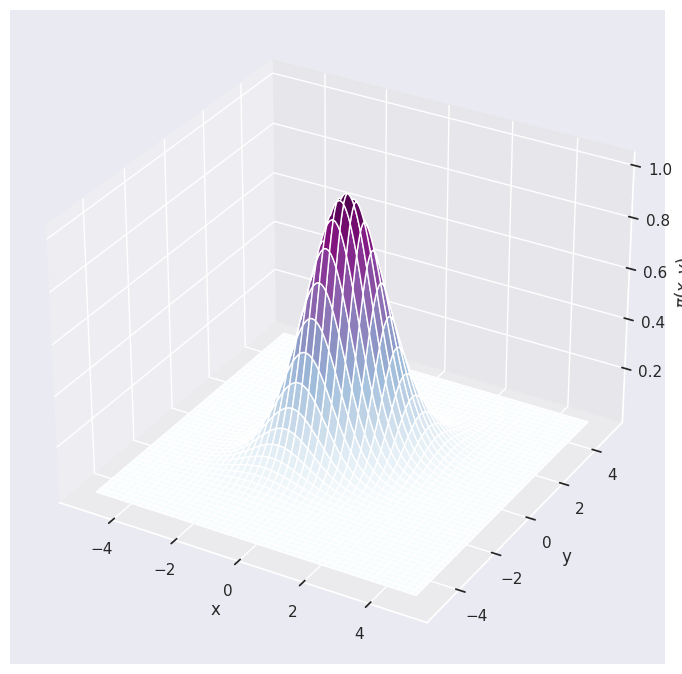

In [235]:
def autocorrelation_plot(x, l):
    #Genera un gráfico de autocorrelación de x hasta el lag = l
    plt.acorr(x - np.mean(x), maxlags=l, normed=True, usevlines=False)
    plt.xlim((0, l))
    plt.ylabel('Autocorrelación')
    plt.xlabel('Lag')

# Definición de la media y la covarianza
mean = np.array([0, 0])  # Vector de media para la distribución bivariada
var = np.array([[1, 0.5], [0.5, 1]])  # Matriz de covarianza
nu = 10  # Grados de libertad

# Crear la cuadrícula para el gráfico 3D
x, y = np.linspace(-5, 5, 200), np.linspace(-5, 5, 200)  # Crear rangos de valores para x e y
X, Y = np.meshgrid(x, y)  # Crear una cuadrícula de coordenadas (X, Y)

# Generar la distribución t de Student bivariada evaluando en la cuadrícula
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = t_student_bivariate_pdf(X[i, j], Y[i, j], mean, var, nu)

# Graficar la superficie en 3D
fig = plt.figure(figsize=(12, 8.5))  # Crear una figura con un tamaño específico
ax = fig.add_subplot(111, projection='3d')  # Agregar un subplot 3D
ax.plot_surface(X, Y, Z, cmap='BuPu')  # Graficar la superficie utilizando el colormap 'BuPu'

# Establecer etiquetas para los ejes del gráfico 3D
ax.set_xlabel('x')  # Etiqueta para el eje X
ax.set_ylabel('y')  # Etiqueta para el eje Y
ax.set_zlabel('$\pi(x,y)$')  # Etiqueta para el eje Z (función de densidad)

# Ejemplo de datos para autocorrelación
# Generar muestras de la distribución t de Student
samples = np.random.standard_t(nu, size=(1000, 2)) @ np.linalg.cholesky(var).T + mean  # Muestras bivariadas




 **Función de densidad de probabilidad $ = f(x, y; \nu) = \frac{\Gamma\left(\frac{\nu + 2}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right) \cdot \nu \pi} \left(1 + \frac{x^2 + y^2}{\nu}\right)^{-\frac{\nu + 2}{2}}$** con $\nu $ grados de libertad

In [236]:
# Función que calcula el valor de la densidad de probabilidad para cada valor de x, y con v grados de libertad dada.
def f(x,y,v):
    return (math.gamma((v + 2) / 2) / (math.gamma(v / 2) * v * np.pi))*((1 + (x**2 + y**2) / v)**(-(v + 2) / 2))

Establecer el valor de los grados de libertad $\nu$

In [237]:
v=10

In [238]:
# Método para el algoritmo Metropolis-Hastings
def metropolis_hastings(p, n, x0, y0, step):

    #Parámetros de entrada:
    # p ->  Función de densidad de probabilidad objetivo.
    # n ->  Número de iteraciones (o muestras) a generar.
    # x0 ->  Valor inicial para la coordenada X.
    # y0 ->  Valor inicial para la coordenada Y.
    # step -> Tamaño del paso para el muestreo.

    # Inicializamos las coordenadas con los valores iniciales
    x = x0
    y = y0

    # Lista para almacenar las muestras generadas
    points = np.zeros((n, 2))  # Inicializamos un array de ceros para n muestras

    # Ejecutamos el algoritmo durante n iteraciones
    for i in range(n):
        # Proponemos nuevos valores (x_star, y_star) alrededor del estado actual
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=step, size=2)

        # Condición de aceptación según el criterio de Metropolis-Hastings
        if np.random.rand() < p(x_star, y_star,v) / p(x, y,v):
            # Si se acepta el nuevo estado, actualizamos las coordenadas
            x, y = x_star, y_star

        # Guardamos la muestra actual en la lista de puntos
        points[i] = np.array([x, y])

    return points  # Retornamos el array de muestras generadas

In [239]:
# Generar las muestras
samples = metropolis_hastings(f, 10000, 0, 0, 0.05)
# Calcular media y covarianza (después de burn-in)
burn_in = 3000  # Ignorar las primeras 1000 muestras
mean_estimate = np.mean(samples[burn_in:], axis=0)
cov_estimate = np.cov(samples[burn_in:, 0], samples[burn_in:, 1])
print("Media muestral:", mean_estimate)
print("Covarianza muestral :\n", cov_estimate)

Media muestral: [-0.32304299 -0.02540171]
Covarianza muestral :
 [[0.45914869 0.09393759]
 [0.09393759 1.02628396]]


**Diferencias entre medias y covarianzas analíticas y muestrales:**

In [240]:
dif_medias=mean-mean_estimate
print("Diferencias entre medias analíticas y muestrales:", dif_medias)
dif_covarianza=var-cov_estimate
print("Diferencias entre covarianzas analíticas y muestrales:\n", dif_covarianza)

Diferencias entre medias analíticas y muestrales: [0.32304299 0.02540171]
Diferencias entre covarianzas analíticas y muestrales:
 [[ 0.54085131  0.40606241]
 [ 0.40606241 -0.02628396]]


 **Gráfica de caminantes**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


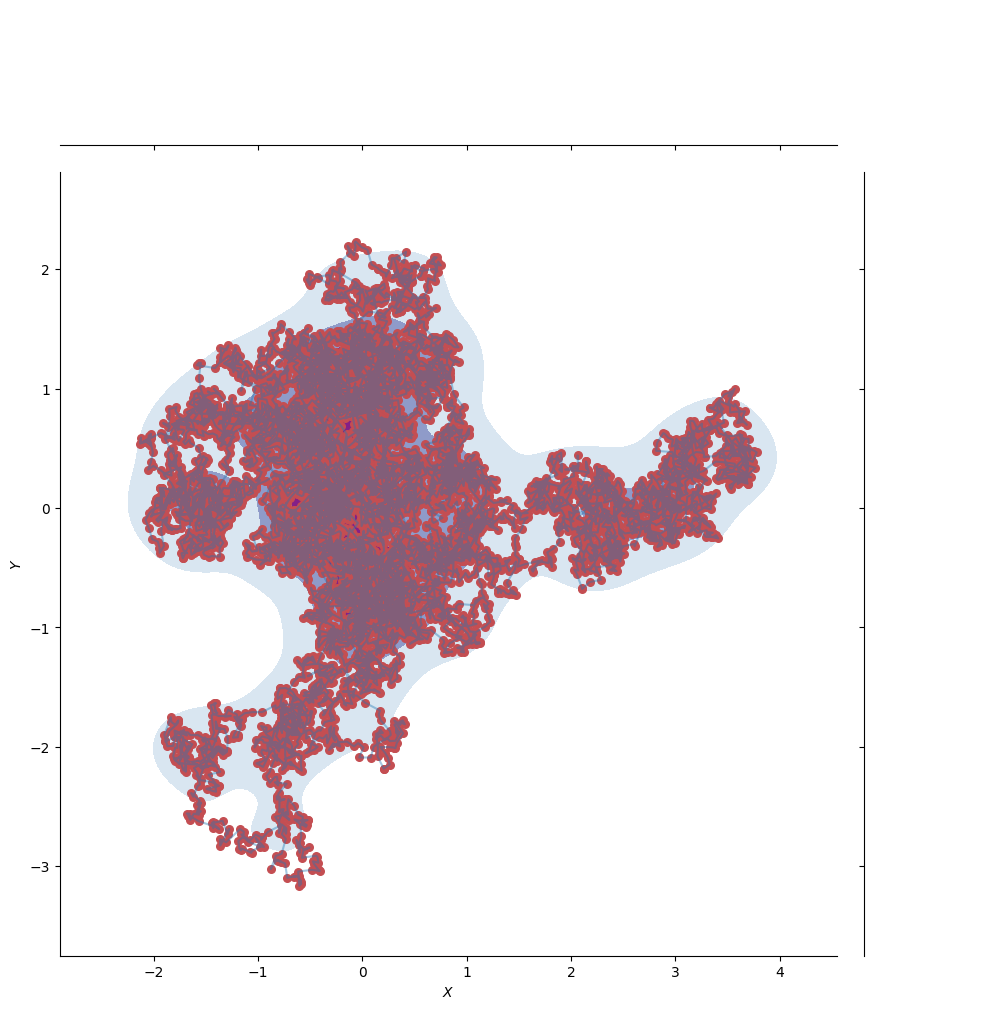

In [241]:
# Visualizar
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminates.png')
plt.show()  # Para mostrar el gráfico si es necesario

# **Distribución 2:**

**Distribución Uniforme**



**Establecer el valor de a1, b1, a2, b2**

In [242]:
a1=-0.5
b1=1.5
a2=-0.5
b2=1.5

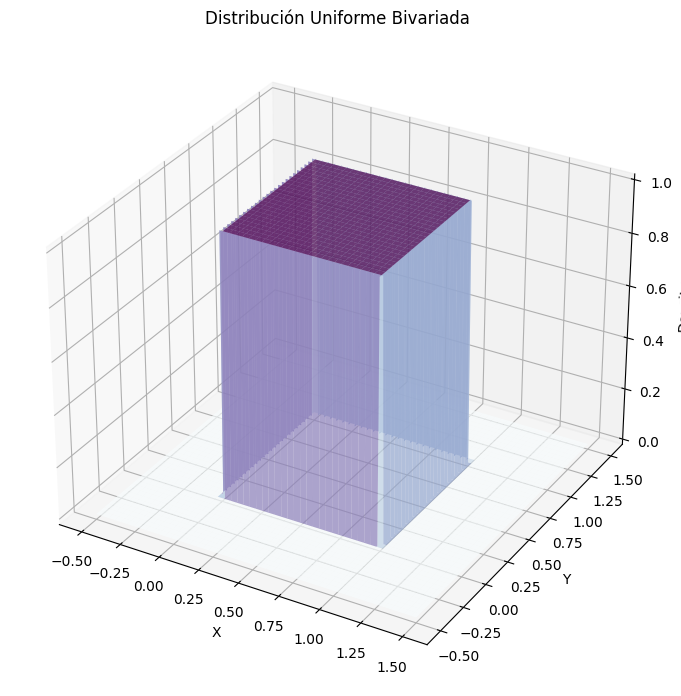

In [243]:
def uniform_bivariate_pdf(x, y, a1, b1, a2, b2):
    if a1 <= x <= b1 and a2 <= y <= b2:
        return 1 / ((b1 - a1) * (b2 - a2))  # PDF constante dentro del rango
    else:
        return 0  # PDF es cero fuera del rango

# Definición de los límites de la distribución
a1, b1 = 0, 1  # límites para X
a2, b2 = 0, 1  # límites para Y

# Crear la cuadrícula para el gráfico 3D
x = np.linspace(-0.5, 1.5, 200)
y = np.linspace(-0.5, 1.5, 200)
X, Y = np.meshgrid(x, y)

# Generar la distribución uniforme bivariada evaluando en la cuadrícula
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = uniform_bivariate_pdf(X[i, j], Y[i, j], a1, b1, a2, b2)

# Graficar la superficie en 3D
fig = plt.figure(figsize=(12, 8.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='BuPu', alpha=0.7)

# Establecer etiquetas para los ejes del gráfico 3D
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
ax.set_title('Distribución Uniforme Bivariada')

plt.show()  # Mostrar la gráfica

In [244]:
# Cálculo analítico de la media
mean = np.array([(a1 + b1) / 2, (a2 + b2) / 2])
# Cálculo analítico de la varianza
var_x = (b1 - a1) ** 2 / 12
var_y = (b2 - a2) ** 2 / 12
print("Media analítica:", mean)
print("Varianza analítica:", var_x, var_y)

Media analítica: [0.5 0.5]
Varianza analítica: 0.08333333333333333 0.08333333333333333


In [245]:
def f(x, y, a1, b1, a2, b2):
    if a1 <= x <= b1 and a2 <= y <= b2:
        return 1 / ((b1 - a1) * (b2 - a2))  # PDF constante dentro del rango
    else:
        return 0  # PDF es cero fuera del rango

In [246]:
# Método para el algoritmo Metropolis-Hastings
def metropolis_hastings(p, n, x0, y0, step):

    #Parámetros de entrada:
    # p ->  Función de densidad de probabilidad objetivo.
    # n ->  Número de iteraciones (o muestras) a generar.
    # x0 ->  Valor inicial para la coordenada X.
    # y0 ->  Valor inicial para la coordenada Y.
    # step -> Tamaño del paso para el muestreo.

    # Inicializamos las coordenadas con los valores iniciales
    x = x0
    y = y0

    # Lista para almacenar las muestras generadas
    points = np.zeros((n, 2))  # Inicializamos un array de ceros para n muestras

    # Ejecutamos el algoritmo durante n iteraciones
    for i in range(n):
        # Proponemos nuevos valores (x_star, y_star) alrededor del estado actual
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=step, size=2)

        # Condición de aceptación según el criterio de Metropolis-Hastings
        if np.random.rand() < p(x_star, y_star,a1,b1,a2,b2) / p(x, y,a1,b1,a2,b2):
            # Si se acepta el nuevo estado, actualizamos las coordenadas
            x, y = x_star, y_star

        # Guardamos la muestra actual en la lista de puntos
        points[i] = np.array([x, y])

    return points  # Retornamos el array de muestras generadas

In [247]:
# Generar las muestras
samples = metropolis_hastings(f, 10000, 0, 0, 0.05)
# Calcular media y covarianza (después de burn-in)
burn_in = 3000  # Ignorar las primeras 1000 muestras
mean_estimate = np.mean(samples[burn_in:], axis=0)
cov_estimate = np.cov(samples[burn_in:, 0], samples[burn_in:, 1])
print("Media muestral:", mean_estimate)
print("Varianza muestral :\n", cov_estimate[0,0],cov_estimate[1,1])

Media muestral: [0.49832135 0.52678501]
Varianza muestral :
 0.07872337940956228 0.08702127655663086


**Diferencias entre medias y covarianzas analíticas y muestrales:**

In [248]:
dif_medias=mean-mean_estimate
print("Diferencias entre medias analíticas y muestrales:", dif_medias)
dif_varianzas=[var_x-cov_estimate[0,0],var_y-cov_estimate[1,1]]
print("Diferencias entre covarianzas analíticas y muestrales:\n", dif_varianzas)

Diferencias entre medias analíticas y muestrales: [ 0.00167865 -0.02678501]
Diferencias entre covarianzas analíticas y muestrales:
 [0.004609953923771046, -0.0036879432232975323]


 **Gráfica de caminantes**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


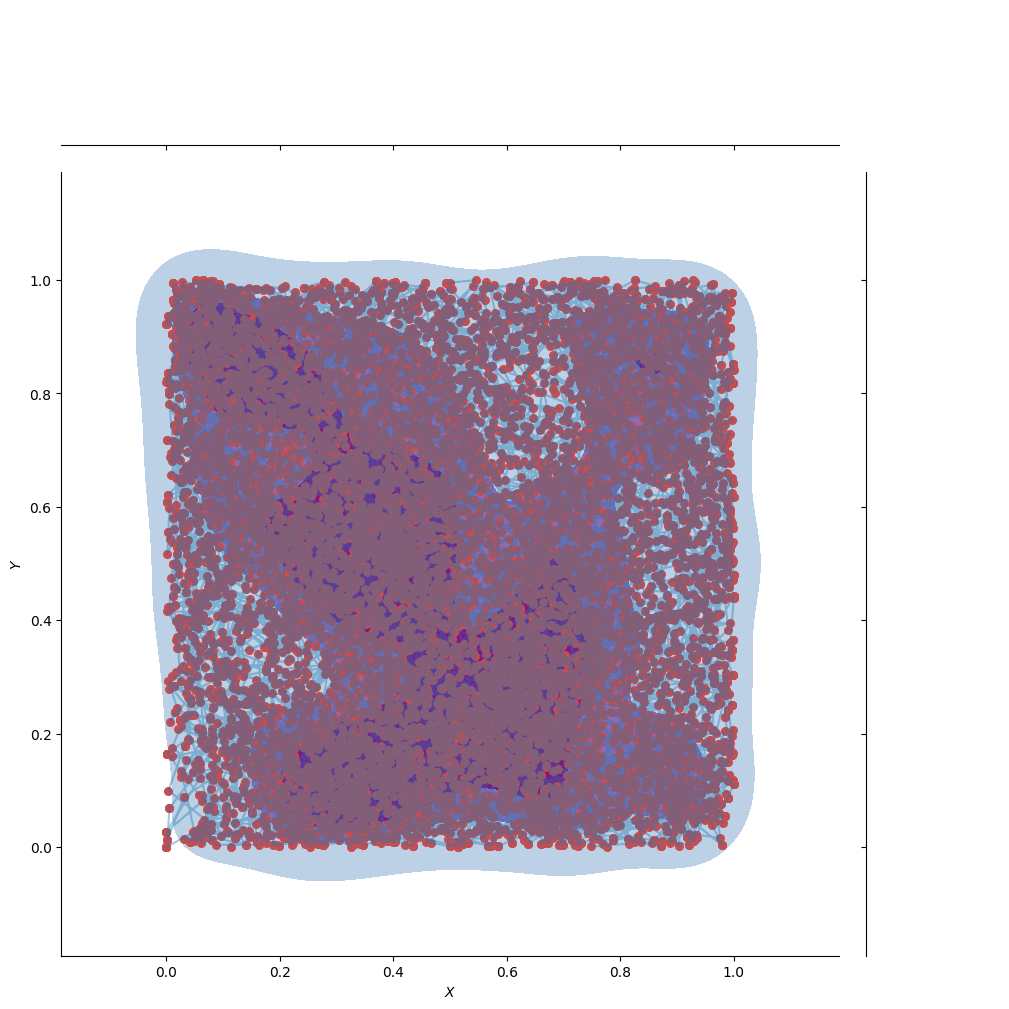

In [249]:
# Visualizar
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminates.png')
plt.show()  # Para mostrar el gráfico si es necesario

# **Distribución 3:**

## **Distribución exponencial**

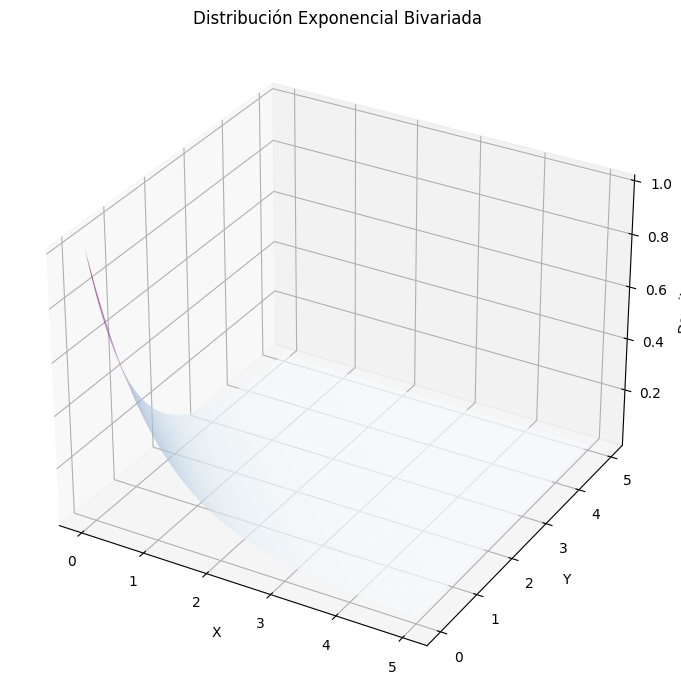

In [250]:
# Función que calcula el valor de la densidad de probabilidad para una exponencial bivariada
def exponencial_bivariada_pdf(x, y, lambda1, lambda2):
    if x >= 0 and y >= 0:
        return lambda1 * lambda2 * np.exp(-lambda1 * x - lambda2 * y)  # PDF exponencial
    else:
        return 0

# Definición de los parámetros de la distribución
lambda1 = 1  # Parámetro de la variable X
lambda2 = 1  # Parámetro de la variable Y

# Crear la cuadrícula para el gráfico 3D
x = np.linspace(0, 5, 200)  # Rango para X
y = np.linspace(0, 5, 200)  # Rango para Y
X, Y = np.meshgrid(x, y)

# Generar la distribución exponencial bivariada evaluando en la cuadrícula
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = exponencial_bivariada_pdf(X[i, j], Y[i, j], lambda1, lambda2)

# Graficar la superficie en 3D
fig = plt.figure(figsize=(12, 8.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='BuPu', alpha=0.7)

# Establecer etiquetas para los ejes del gráfico 3D
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
ax.set_title('Distribución Exponencial Bivariada')

plt.show()  # Mostrar la gráfica

In [251]:
# Cálculo analítico de la media
mean = np.array([1 / lambda1, 1 / lambda2])
# Cálculo analítico de la varianza
var_x = 1 / (lambda1 ** 2)
var_y = 1 / (lambda2 ** 2)

print("Media analítica:", mean)
print("Varianza analítica:", np.array([var_x, var_y]))

Media analítica: [1. 1.]
Varianza analítica: [1. 1.]


In [252]:
def f(x, y, lambda1, lambda2):
    if x >= 0 and y >= 0:
        return lambda1 * np.exp(-lambda1 * x) * lambda2 * np.exp(-lambda2 * y)
    else:
        return 0  # PDF es cero fuera del rango

In [253]:
# Método para el algoritmo Metropolis-Hastings
def metropolis_hastings(p, n, x0, y0, step):

    #Parámetros de entrada:
    # p ->  Función de densidad de probabilidad objetivo.
    # n ->  Número de iteraciones (o muestras) a generar.
    # x0 ->  Valor inicial para la coordenada X.
    # y0 ->  Valor inicial para la coordenada Y.
    # step -> Tamaño del paso para el muestreo.

    # Inicializamos las coordenadas con los valores iniciales
    x = x0
    y = y0

    # Lista para almacenar las muestras generadas
    points = np.zeros((n, 2))  # Inicializamos un array de ceros para n muestras

    # Ejecutamos el algoritmo durante n iteraciones
    for i in range(n):
        # Proponemos nuevos valores (x_star, y_star) alrededor del estado actual
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=step, size=2)

        # Condición de aceptación según el criterio de Metropolis-Hastings
        if np.random.rand() < p(x_star, y_star,lambda1,lambda2) / p(x, y,lambda1,lambda2):
            # Si se acepta el nuevo estado, actualizamos las coordenadas
            x, y = x_star, y_star

        # Guardamos la muestra actual en la lista de puntos
        points[i] = np.array([x, y])

    return points  # Retornamos el array de muestras generadas

In [266]:
# Generar las muestras
samples = metropolis_hastings(f, 10000, 0, 0, 0.05)
# Calcular media y covarianza (después de burn-in)
burn_in = 5000  # Ignorar las primeras 1000 muestras
mean_estimate = np.mean(samples[burn_in:], axis=0)
cov_estimate = np.cov(samples[burn_in:, 0], samples[burn_in:, 1])
print("Media muestral:", mean_estimate)
print("Varianza muestral :\n", cov_estimate[0,0],cov_estimate[1,1])

Media muestral: [0.88112196 1.74230318]
Varianza muestral :
 0.5937920564631155 1.3904445520636275


**Diferencias entre medias y covarianzas analíticas y muestrales:**

In [267]:
dif_medias=mean-mean_estimate
print("Diferencias entre medias analíticas y muestrales:", dif_medias)
dif_varianzas=[var_x-cov_estimate[0,0],var_y-cov_estimate[1,1]]
print("Diferencias entre covarianzas analíticas y muestrales:\n", dif_varianzas)

Diferencias entre medias analíticas y muestrales: [ 0.11887804 -0.74230318]
Diferencias entre covarianzas analíticas y muestrales:
 [0.4062079435368845, -0.3904445520636275]


 **Gráfica de caminantes**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


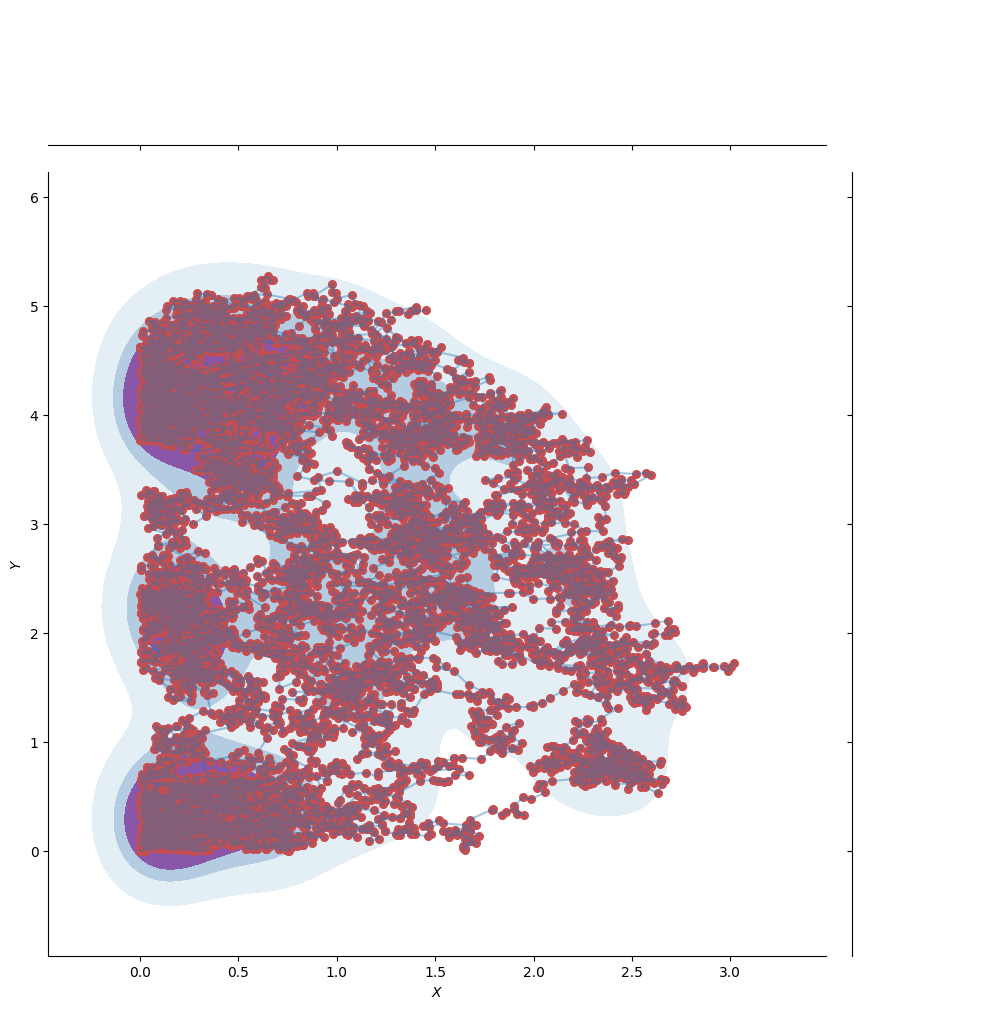

In [268]:
# Visualizar
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminates.png')
plt.show()  # Para mostrar el gráfico si es necesario